In [ ]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV 파일에서 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/project/non_normalized/bigtrain.csv', header=None)  # 정규화 안된버전
test_data = pd.read_csv('/content/drive/MyDrive/project/non_normalized/test.csv', header=None)

In [ ]:
mnist = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
type(mnist)

tuple

In [ ]:
train = list(train_data.to_records(index=False))

In [ ]:
type(train_data)

list

In [ ]:
chord = pd.read_csv('/content/drive/My Drive/Colab Notebooks/contents/chordmap.csv', header=None,encoding='utf-8')  # train_wav.csv 파일 경로에 따라 수정

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data[0])
y_test = label_encoder.fit_transform(test_data[0])

In [ ]:
X_train = train_data.drop(columns=[0])
#y_train = train_data[0]

X_test = test_data.drop(columns=[0])
#y_test = test_data[0]

In [ ]:
xtrain = X_train.values

In [ ]:
train_scaled = xtrain.reshape(-1,12,126,1)

In [ ]:
train_scaled, val_scaled, y_train, val_target = train_test_split(train_scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding = 'same', input_shape = (12,126,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(49, activation='softmax'))


In [ ]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation='relu', padding = 'same', input_shape = (12,126,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu', padding = 'same'))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 12, 126, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 63, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 63, 64)         18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 31, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 5952)              0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(49, activation='softmax'))

In [ ]:
from keras.optimizers import Adam


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, y_train, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
29/29 [==============================] - 11s 146ms/step - loss: 3.8024 - accuracy: 0.0691 - val_loss: 3.5235 - val_accuracy: 0.1586
Epoch 2/20
23/29 [======================>.......] - ETA: 0s - loss: 3.1925 - accuracy: 0.1698

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 8ms/step - loss: 3.0620 - accuracy: 0.1996 - val_loss: 2.3160 - val_accuracy: 0.3990
Epoch 3/20
29/29 [==============================] - 4s 146ms/step - loss: 2.0886 - accuracy: 0.4232 - val_loss: 1.2717 - val_accuracy: 0.6573
Epoch 4/20
23/29 [======================>.......] - ETA: 0s - loss: 1.5219 - accuracy: 0.5462

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 9ms/step - loss: 1.4939 - accuracy: 0.5570 - val_loss: 0.7742 - val_accuracy: 0.7954
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 1.0757 - accuracy: 0.6579 - val_loss: 0.5035 - val_accuracy: 0.8696
Epoch 6/20
29/29 [==============================] - 0s 12ms/step - loss: 0.8222 - accuracy: 0.7467 - val_loss: 0.3780 - val_accuracy: 0.9054
Epoch 7/20
19/29 [==================>...........] - ETA: 0s - loss: 0.6828 - accuracy: 0.7796

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 11ms/step - loss: 0.6971 - accuracy: 0.7730 - val_loss: 0.3166 - val_accuracy: 0.9003
Epoch 8/20
29/29 [==============================] - 5s 167ms/step - loss: 0.5696 - accuracy: 0.8114 - val_loss: 0.2155 - val_accuracy: 0.9258
Epoch 9/20
23/29 [======================>.......] - ETA: 0s - loss: 0.4991 - accuracy: 0.8315

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 7ms/step - loss: 0.5019 - accuracy: 0.8311 - val_loss: 0.2191 - val_accuracy: 0.9386
Epoch 10/20
29/29 [==============================] - 0s 8ms/step - loss: 0.4889 - accuracy: 0.8520 - val_loss: 0.1988 - val_accuracy: 0.9233
Epoch 11/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3474 - accuracy: 0.8914 - val_loss: 0.1656 - val_accuracy: 0.9361
Epoch 12/20
29/29 [==============================] - 4s 144ms/step - loss: 0.3456 - accuracy: 0.8816 - val_loss: 0.1471 - val_accuracy: 0.9591
Epoch 13/20
22/29 [=====================>........] - ETA: 0s - loss: 0.3193 - accuracy: 0.9020

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 9ms/step - loss: 0.2981 - accuracy: 0.9079 - val_loss: 0.0841 - val_accuracy: 0.9744
Epoch 14/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2333 - accuracy: 0.9232 - val_loss: 0.0806 - val_accuracy: 0.9744
Epoch 15/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2595 - accuracy: 0.9232 - val_loss: 0.0764 - val_accuracy: 0.9744
Epoch 16/20
29/29 [==============================] - 0s 12ms/step - loss: 0.2373 - accuracy: 0.9134 - val_loss: 0.0736 - val_accuracy: 0.9770
Epoch 17/20
20/29 [===================>..........] - ETA: 0s - loss: 0.2073 - accuracy: 0.9328

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - 0s 10ms/step - loss: 0.1983 - accuracy: 0.9364 - val_loss: 0.0711 - val_accuracy: 0.9795
Epoch 18/20
29/29 [==============================] - 5s 172ms/step - loss: 0.1646 - accuracy: 0.9496 - val_loss: 0.0960 - val_accuracy: 0.9770
Epoch 19/20
29/29 [==============================] - 0s 7ms/step - loss: 0.1890 - accuracy: 0.9342 - val_loss: 0.1042 - val_accuracy: 0.9693


In [ ]:
model.evaluate(val_scaled, val_target)

13/13 [==============================] - 2s 165ms/step - loss: 0.0711 - accuracy: 0.9795


[0.07107414305210114, 0.9795396327972412]

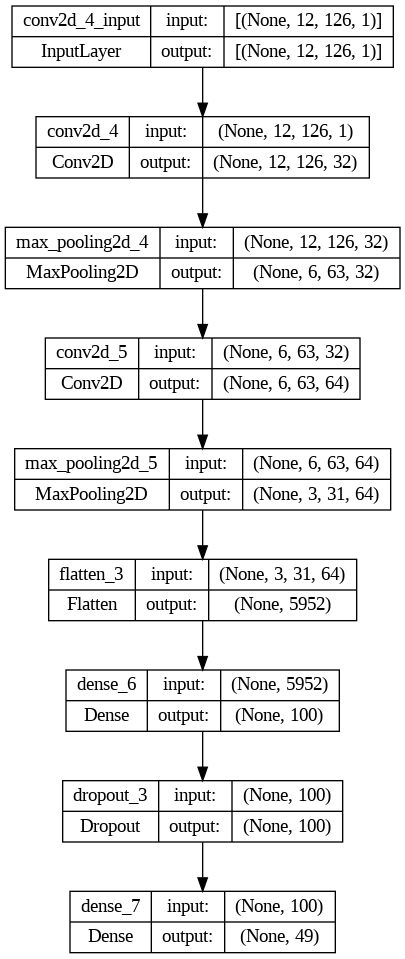

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

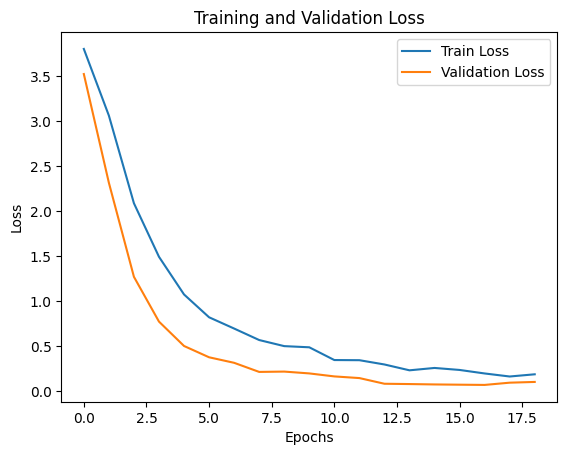

In [ ]:
# 손실 그래프 그리기
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

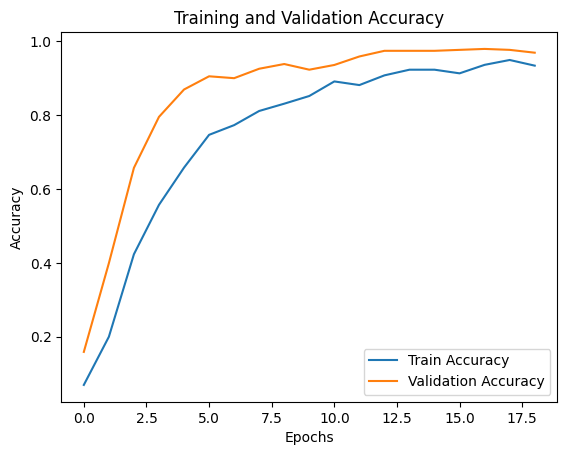

In [ ]:
# 정확도 그래프 그리기
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.utils import plot_model
import matplotlib.pyplot as plt


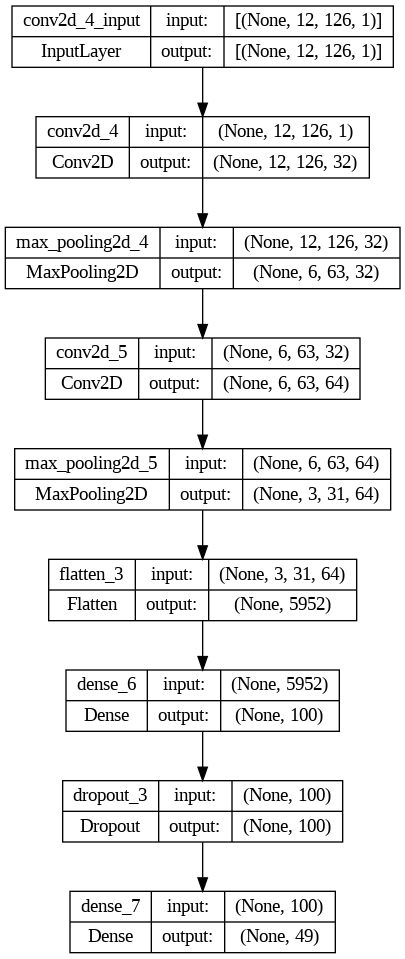

In [ ]:
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [ ]:
# 이미지 파일을 표시
img = plt.imread('model_structure.png')
plt.imshow(img)
plt.show()

In [ ]:
# Step 2: 모델 구축
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Step 4: 모델 평가
y_test_prob = model.predict(X_test)
y_test_pred = y_test_prob.argmax(axis=1)
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy}')

14/14 [==============================] - 0s 2ms/step
Test Accuracy: 0.805045871559633


In [ ]:
def load_and_predict_wav(file_path, model):
    # WAV 파일 로드
    y, sr = librosa.load(file_path, sr=None)

    # 크로마그램 생성
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
    chromagram_filtered = chromagram * (chromagram > 0.8)

    # 크로마그램 정규화
    min_value = np.min(chromagram)
    max_value = np.max(chromagram)
    normalized_chromagram = (chromagram - min_value) / (max_value - min_value) * 255
    rounded_normalized_chromagram = np.around(normalized_chromagram).astype(int)

    input_data = rounded_normalized_chromagram.reshape((1,1512))

    # 모델 예측
    predicted_prob = model.predict(input_data)
    predicted_code = np.argmax(predicted_prob)

    return predicted_code

In [ ]:
# 테스트할 WAV 파일 경로
test_wav_file = '/content/drive/MyDrive/Colab Notebooks/contents/piano/piano_3_Gn_a_f_56.wav'  # 테스트할 WAV 파일 경로를 설정해주세요.


In [ ]:
# 모델을 사용하여 코드 예측
predicted_code = load_and_predict_wav(test_wav_file, model)
print(f'The predicted code is: {predicted_code}')

1/1 [==============================] - 0s 29ms/step
The predicted code is: 2


In [ ]:
# 모델 정의 코드에서 첫 번째 레이어의 shape 확인
input_shape = model.layers[0].input_shape
print("모델의 입력 shape:", input_shape)

모델의 입력 shape: (None, 1512)


In [ ]:
print(f"예측값은 : ",chordmap[predicted_code])

예측값은 :  Ab_dim
